# Exploring the Weather Data Set of the Nairobi Ambulance Challenge <a name="Top"></a>
***
In this notebook we will look further into the Weather_Nairobi_Daily_GFS.csv data set.

## Table of Contents

[Imports and setup](#Imports_setup)<br>
[Extract, transform and load the data](#ETL)<br>
[Data analysis](#Data_analysis)<br>
[Data cleaning](#Data_cleaning)<br>
[Data engineering](#Data_engineering)<br>

</br>
</br>
</br>

***
## Imports and setup <a name="Imports_setup"></a>

### Importing packages

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Setup

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.3f}'.format

[Back to top](#Top)<br>

</br>
</br>
</br>

## Extract, transform and load the data <a name="ETL"></a>

Importing the weather data.

In [3]:
df_weather = pd.read_csv('../Inputs/Weather_Nairobi_Daily_GFS.csv', parse_dates=['Date'])
print(df_weather.shape)
df_weather.head()

(731, 7)


,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,2018-01-01,24.100,72.700,0.010,15.161,-0.012,-0.934
1,2018-01-02,27.362,74.900,0.010,16.048,0.315,-0.485
2,2018-01-03,30.247,86.600,0.012,15.839,-0.283,-0.654
3,2018-01-04,33.011,90.900,0.013,16.169,0.212,0.908
4,2018-01-05,27.250,82.413,0.011,15.923,1.047,-0.038


In [4]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  731 non-null    datetime64[ns]
 1   precipitable_water_entire_atmosphere  728 non-null    float64       
 2   relative_humidity_2m_above_ground     728 non-null    float64       
 3   specific_humidity_2m_above_ground     728 non-null    float64       
 4   temperature_2m_above_ground           728 non-null    float64       
 5   u_component_of_wind_10m_above_ground  728 non-null    float64       
 6   v_component_of_wind_10m_above_ground  728 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 40.1 KB


In [5]:
df_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitable_water_entire_atmosphere,728.000,23.977,4.693,10.800,20.700,24.025,27.500,34.000
relative_humidity_2m_above_ground,728.000,83.160,9.085,42.200,79.888,85.627,89.600,95.769
specific_humidity_2m_above_ground,728.000,0.011,0.001,0.006,0.010,0.011,0.012,0.013
temperature_2m_above_ground,728.000,15.176,1.127,11.750,14.431,15.231,15.916,19.928
u_component_of_wind_10m_above_ground,728.000,-1.907,1.251,-5.880,-2.736,-1.953,-1.168,3.478
v_component_of_wind_10m_above_ground,728.000,-1.128,1.119,-3.797,-1.979,-1.084,-0.274,1.973


Importing the accident data from train.csv

In [6]:
df_train = pd.read_csv('../Inputs/Train.csv', parse_dates=['datetime'])
print(df_train.shape)
df_train.head()

(6318, 4)


,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.189,36.931
1,2,2018-01-01 02:02:39,-0.663,37.209
2,3,2018-01-01 02:31:49,-0.663,37.209
3,4,2018-01-01 03:04:01,-1.288,36.827
4,5,2018-01-01 03:58:49,-1.189,36.931


[Back to top](#Top)<br>

</br>
</br>
</br>

## Data analysis <a name="Data_analysis"></a>

[Back to top](#Top)<br>

</br>
</br>
</br>

## Data cleaning <a name="Data_cleaning"></a>

In [7]:
missing_bool = pd.isnull(df_weather).any(1)
df_weather[missing_bool]

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
74,2018-03-16,nan,nan,nan,nan,nan,nan
75,2018-03-17,nan,nan,nan,nan,nan,nan
76,2018-03-18,nan,nan,nan,nan,nan,nan


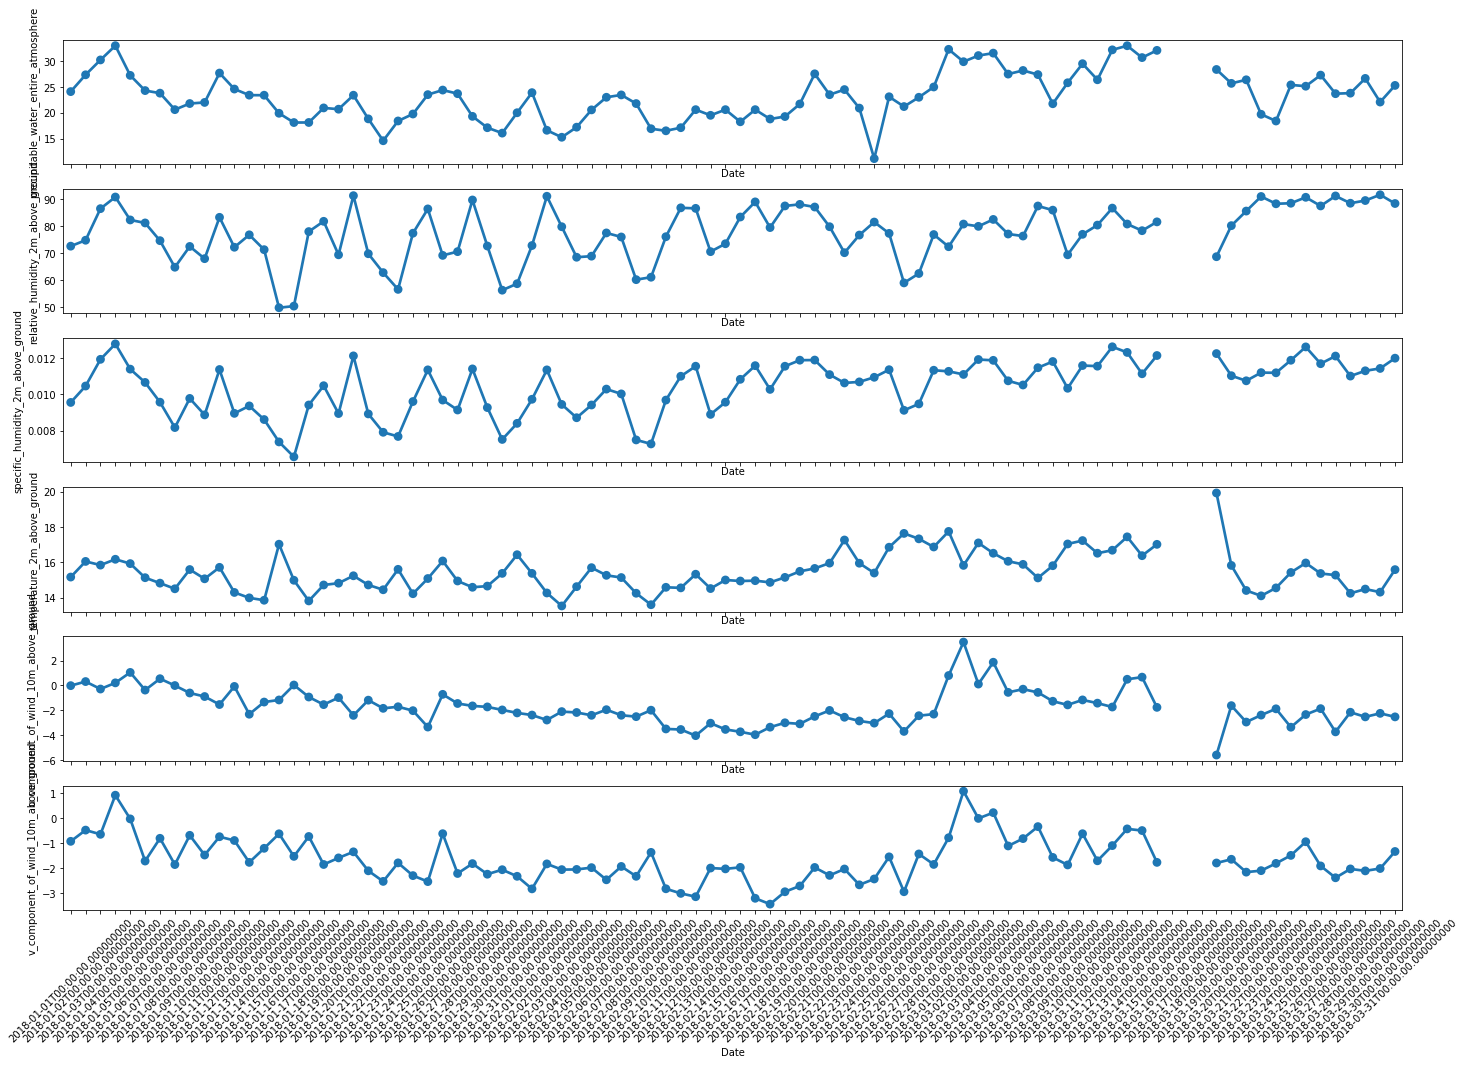

In [8]:
quarter = df_weather[(df_weather["Date"] >= "2018-01-01") & (df_weather["Date"] <= "2018-03-31")]

fig, ax = plt.subplots(6, 1, sharex=True, figsize=(24, 16))
for col in range(len(quarter.columns)-1):
    chart = sns.pointplot(ax=ax[col], x=quarter["Date"], y=quarter[quarter.columns[col+1]]);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [9]:
def clean_weather_data(data):
    '''
    
    '''
    
    missing = data[pd.isnull(data).any(1)].index
    
    for col in data.columns[1:]:
        before = data.loc[missing[0]-1, col]
        after = data.loc[missing[-1]+1, col]
        diff = after - before
        for i in range(len(missing)):
            data.loc[missing[i], col] = before+diff/(len(missing)+1)*(i+1)
    return data

In [10]:
df_weather = clean_weather_data(df_weather)

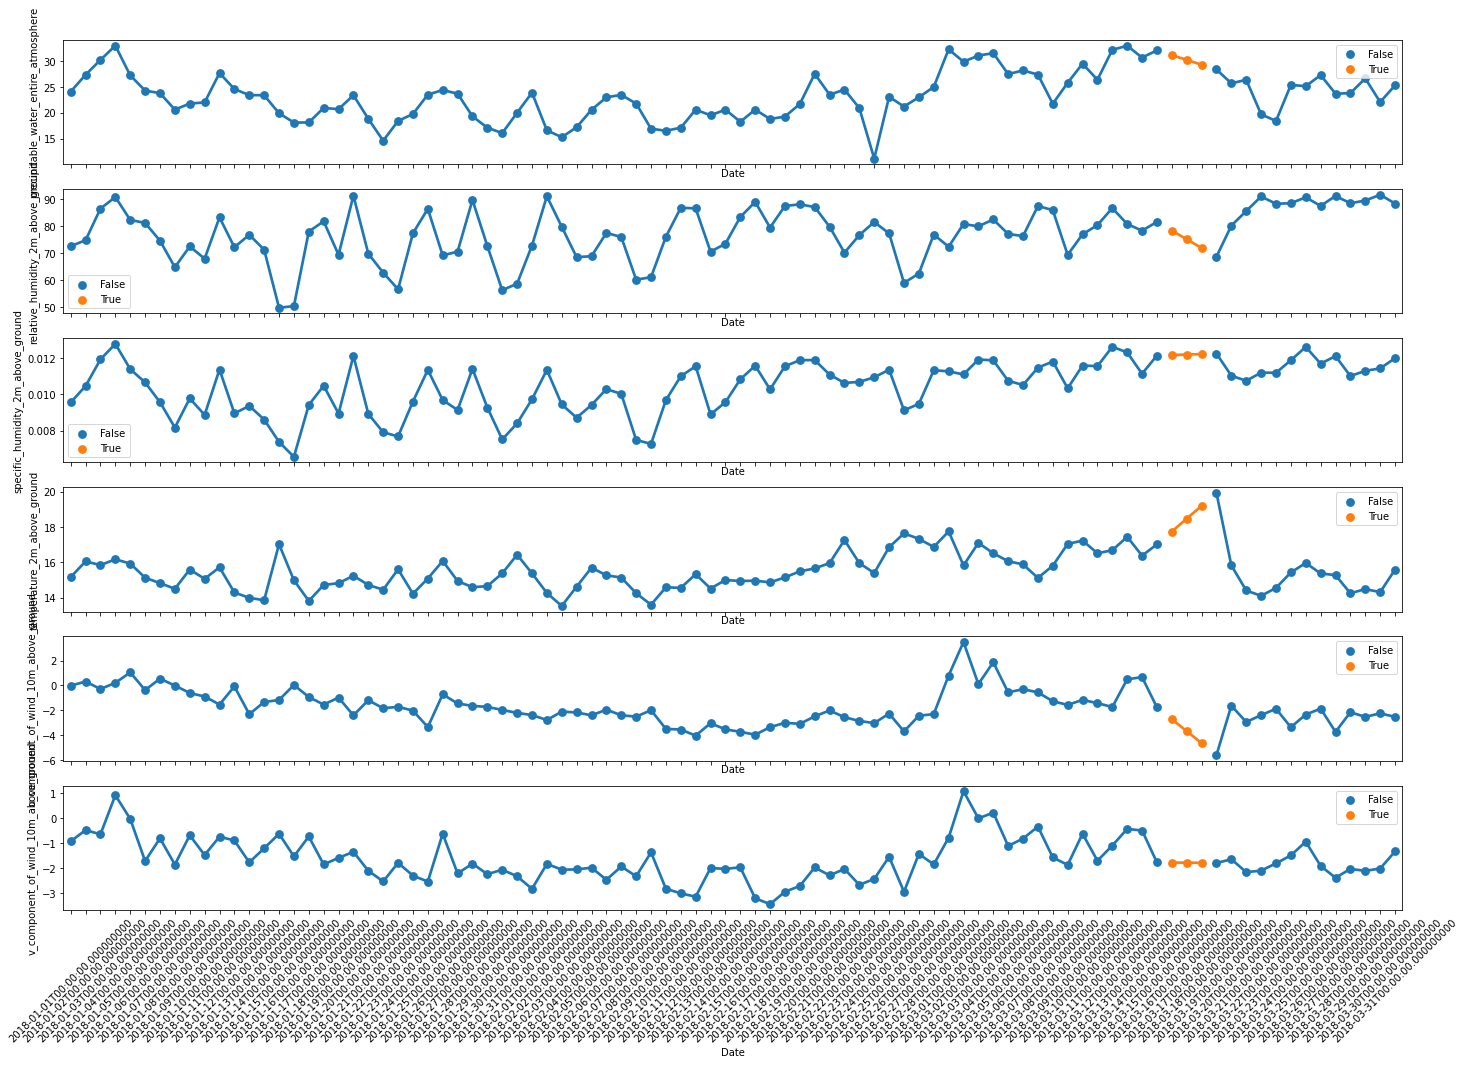

In [12]:
quarter = df_weather[(df_weather["Date"] >= "2018-01-01") & (df_weather["Date"] <= "2018-03-31")]

fig, ax = plt.subplots(6, 1, sharex=True, figsize=(24, 16))
for col in range(len(quarter.columns)-1):
    chart = sns.pointplot(ax=ax[col], x=quarter["Date"], y=quarter[quarter.columns[col+1]], hue=missing_bool);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

[Back to top](#Top)<br>

</br>
</br>
</br>

## Data engineering <a name="Data_engineering"></a>

* join accident data
* plot against target variable
* external data
* distribute over day

[Back to top](#Top)<br>